## **Load and Test all 4 trained and tuned models with test sets**

In [1]:
import os
import torch
from torch import nn
import random
from torch.utils.data import DataLoader
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from tqdm.notebook import tqdm

In [2]:
#ensure current folder is the project folder and not the notebook folder

os.chdir('../')
os.getcwd()

In [3]:
from src.models.deepfake_detectors import Efficientnet_GRU_Model, Efficientnet
from src.dataset import *
from src.utils import *
from src.train_val_funcs import *


In [4]:
train_df, valid_df, test_df, test_celeb = load_data()

## **Test EfficientNet-GRU Model tuned manually**

In [5]:
model = Efficientnet_GRU_Model(2, dropout_rate=0.3, bidirectional=True).cuda()
model.load_state_dict(torch.load('./models/EfficientNet_GRU_Model_manual.pt'))
model.eval()

C:\Users\leovc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\leovc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Efficientnet_GRU_Model(
  (model): Sequential(
    (0): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU(inplace=True)
      )
      (1): Sequential(
        (0): MBConv(
          (block): Sequential(
            (0): Conv2dNormActivation(
              (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
              (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): SiLU(inplace=True)
            )
            (1): SqueezeExcitation(
              (avgpool): AdaptiveAvgPool2d(output_size=1)
              (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
              (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
              (activation): SiLU(inplace=True)
              (scale_a

In [6]:
test_data = VideoDataset(test_df, frames_to_use = 22, im_size=112, transform = test_transforms(112))
tst_loader = DataLoader(test_data, batch_size = 2, shuffle = True, num_workers = 0)
criterion = nn.CrossEntropyLoss().cuda()
true,pred,tl,t_acc = run_effnetgru(model,tst_loader,criterion)

  0%|          | 0/1713 [00:00<?, ?it/s]


Accuracy 91.21424401634559


[[2563  262]
 [  39  562]]


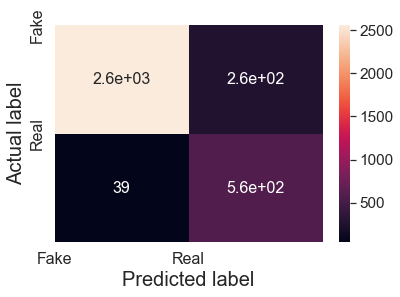

True positives =  2563
False positives =  262
False negatives =  39
True negatives =  562


Accuracy:  91.21424401634559
Precision:  0.9072566371681416
Recall:  0.9850115295926211


In [7]:
print(confusion_matrix(true,pred)) 
print_confusion_matrix(true,pred) 

  0%|          | 0/259 [00:00<?, ?it/s]


Accuracy 83.59073359073359
[[337   3]
 [ 82  96]]


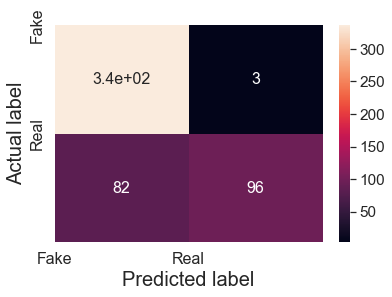

True positives =  337
False positives =  3
False negatives =  82
True negatives =  96


Accuracy:  83.59073359073359
Precision:  0.9911764705882353
Recall:  0.8042959427207638


In [8]:
test_data = VideoDataset(test_celeb, frames_to_use = 22, im_size=121, transform = test_transforms(121))
tst_loader = DataLoader(test_data, batch_size = 2, shuffle = True, num_workers = 0)
criterion = nn.CrossEntropyLoss().cuda()
true,pred,tl,t_acc = run_effnetgru(model,tst_loader,criterion)
print(confusion_matrix(true,pred)) 
print_confusion_matrix(true,pred) 

## **Test EfficientNet Model tuned manually**

In [10]:
model = Efficientnet(2, dropout_rate=0.3).cuda()
model.load_state_dict(torch.load('./models/effnet_manual_last.pt'))
model.eval()

Efficientnet(
  (model): Sequential(
    (0): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU(inplace=True)
      )
      (1): Sequential(
        (0): MBConv(
          (block): Sequential(
            (0): Conv2dNormActivation(
              (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
              (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): SiLU(inplace=True)
            )
            (1): SqueezeExcitation(
              (avgpool): AdaptiveAvgPool2d(output_size=1)
              (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
              (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
              (activation): SiLU(inplace=True)
              (scale_activation)

In [11]:
from src.train_val_funcs import *

test_data = VideoDataset(test_df, frames_to_use = 30, im_size=112, transform = test_transforms(112))
tst_loader = DataLoader(test_data, batch_size = 2, shuffle = True, num_workers = 0)
criterion = nn.CrossEntropyLoss().cuda()
true,pred,tl,t_acc = run_inference(model,tst_loader,criterion)

  0%|          | 0/1713 [00:00<?, ?it/s]

[[2623  202]
 [ 124  477]]


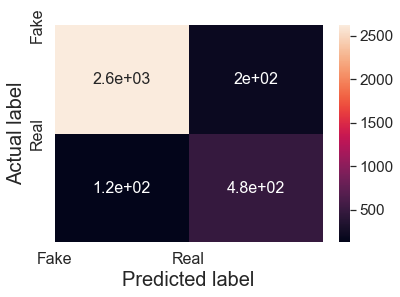

True positives =  2623
False positives =  202
False negatives =  124
True negatives =  477


Accuracy:  90.48453006421482
Precision:  0.9284955752212389
Recall:  0.9548598471059337


In [12]:
print(confusion_matrix(true,pred)) 
print_confusion_matrix(true,pred) 

  0%|          | 0/259 [00:00<?, ?it/s]

[[340   0]
 [124  54]]


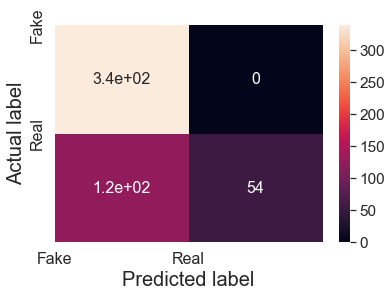

True positives =  340
False positives =  0
False negatives =  124
True negatives =  54


Accuracy:  76.06177606177607
Precision:  1.0
Recall:  0.7327586206896551


In [14]:
test_data = VideoDataset(test_celeb, frames_to_use = 30, im_size=112, transform = test_transforms(112))
tst_loader = DataLoader(test_data, batch_size = 2, shuffle = True, num_workers = 0)
criterion = nn.CrossEntropyLoss().cuda()
true,pred,tl,t_acc = run_inference(model,tst_loader,criterion)
print(confusion_matrix(true,pred)) 
print_confusion_matrix(true,pred) 

## **Test EfficientNet-GRU Model tuned with PSO**

In [27]:
model = Efficientnet_GRU_Model(2, dropout_rate=0.15535, bidirectional=True).cuda()
model.load_state_dict(torch.load('./models/EfficientNet_GRU_Model_pso.pt'))
model.eval()

C:\Users\leovc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\leovc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Efficientnet_GRU_Model(
  (model): Sequential(
    (0): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU(inplace=True)
      )
      (1): Sequential(
        (0): MBConv(
          (block): Sequential(
            (0): Conv2dNormActivation(
              (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
              (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): SiLU(inplace=True)
            )
            (1): SqueezeExcitation(
              (avgpool): AdaptiveAvgPool2d(output_size=1)
              (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
              (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
              (activation): SiLU(inplace=True)
              (scale_a

In [10]:
test_data = VideoDataset(test_df, frames_to_use = 22, im_size=121, transform = test_transforms(121))
tst_loader = DataLoader(test_data, batch_size = 2, shuffle = True, num_workers = 0)
criterion = nn.CrossEntropyLoss().cuda()
true,pred,tl,t_acc = run_inference(model,tst_loader,criterion)

  0%|          | 0/1713 [00:00<?, ?it/s]


Accuracy 93.49095154699359


[[2636  189]
 [  34  567]]


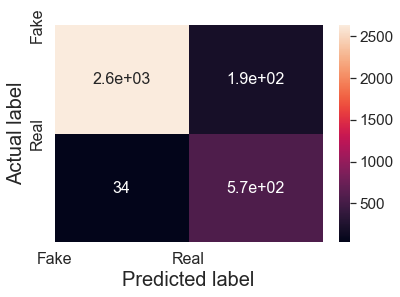

True positives =  2636
False positives =  189
False negatives =  34
True negatives =  567


Accuracy:  93.49095154699359
Precision:  0.9330973451327433
Recall:  0.9872659176029962


In [11]:
print(confusion_matrix(true,pred)) 
print_confusion_matrix(true,pred) 

In [30]:
test_celeb['frames'] = 1
test_celeb['inv_frame'] = 0

test_data = VideoDataset(test_celeb, frames_to_use = 22, im_size=121, transform = test_transforms(121))
tst_loader = DataLoader(test_data, batch_size = 2, shuffle = True, num_workers = 0)
criterion = nn.CrossEntropyLoss().cuda()
true,pred,tl,t_acc = run_inference(model,tst_loader,criterion)


  0%|          | 0/259 [00:00<?, ?it/s]


Accuracy 86.67953667953668


[[336   4]
 [ 65 113]]


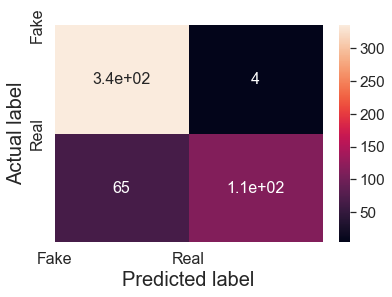

True positives =  336
False positives =  4
False negatives =  65
True negatives =  113


Accuracy:  86.67953667953668
Precision:  0.9882352941176471
Recall:  0.8379052369077307


In [31]:
print(confusion_matrix(true,pred)) 
print_confusion_matrix(true,pred) 

## **Test EfficientNet Model tuned with PSO**

In [18]:
model = Efficientnet(2, dropout_rate=0.15535).cuda()
model.load_state_dict(torch.load('./models/effnet_pso20.pt'))
model.eval()

Efficientnet(
  (model): Sequential(
    (0): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU(inplace=True)
      )
      (1): Sequential(
        (0): MBConv(
          (block): Sequential(
            (0): Conv2dNormActivation(
              (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
              (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): SiLU(inplace=True)
            )
            (1): SqueezeExcitation(
              (avgpool): AdaptiveAvgPool2d(output_size=1)
              (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
              (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
              (activation): SiLU(inplace=True)
              (scale_activation)

In [19]:
from src.train_val_funcs import *

test_data = VideoDataset(test_df, frames_to_use = 22, im_size=121, transform = test_transforms(121))
tst_loader = DataLoader(test_data, batch_size = 2, shuffle = True, num_workers = 0)
criterion = nn.CrossEntropyLoss().cuda()
true,pred,tl,t_acc = run_inference(model,tst_loader,criterion)

  0%|          | 0/1713 [00:00<?, ?it/s]

[[2333  492]
 [  42  559]]


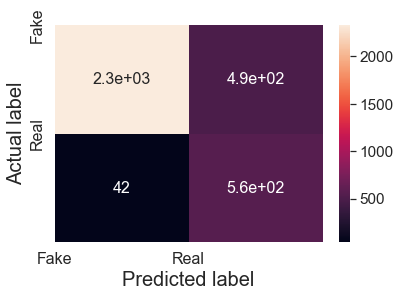

True positives =  2333
False positives =  492
False negatives =  42
True negatives =  559


Accuracy:  84.41330998248687
Precision:  0.8258407079646017
Recall:  0.9823157894736843


In [20]:
print(confusion_matrix(true,pred)) 
print_confusion_matrix(true,pred) 

In [22]:
test_celeb['frames'] = 1
test_celeb['inv_frame'] = 0

test_data = VideoDataset(test_celeb, frames_to_use = 22, im_size=121, transform = test_transforms(121))
tst_loader = DataLoader(test_data, batch_size = 2, shuffle = True, num_workers = 0)
criterion = nn.CrossEntropyLoss().cuda()
true,pred,tl,t_acc = run_inference(model,tst_loader,criterion)

  0%|          | 0/259 [00:00<?, ?it/s]

[[320  20]
 [ 33 145]]


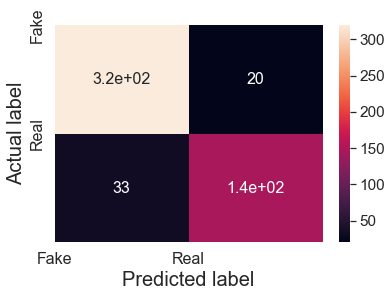

True positives =  320
False positives =  20
False negatives =  33
True negatives =  145


Accuracy:  89.76833976833977
Precision:  0.9411764705882353
Recall:  0.9065155807365439


In [23]:
print(confusion_matrix(true,pred)) 
print_confusion_matrix(true,pred) 